In [ ]:
Name : Bitan Paul || Uid : 20BCS6515 || Sec : 20AIML2B || Sem : 4th

# Aim : 

Implement Decision Tree & Learn About Data Preprocessing

# Operators : 

1. Jupiter Note Book, 
2. Kaggle

# Code:

In [1]:
!pip install opendatasets scikit-learn --quiet --upgrad


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)


In [2]:
!pip install opendatasets scikit-learn --quiet --upgrade

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [5]:
raw_df = pd.read_csv('/Users/bitanpaul/Documents/Academics/ML/CSVs/weatherAUS.csv')

In [6]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

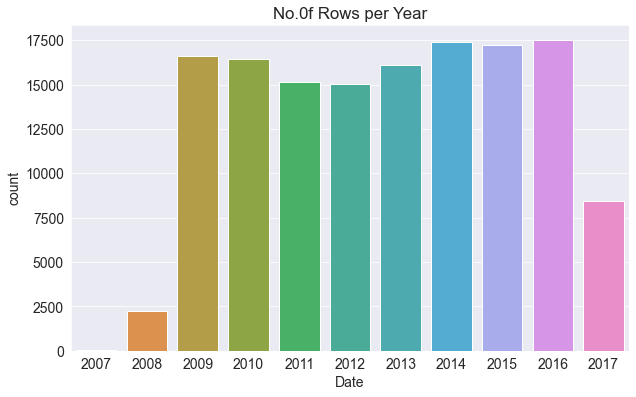

In [9]:
plt.title('No.0f Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [10]:
year=pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df =raw_df[year == 2015]
test_df= raw_df[year > 2015]

In [11]:
input_cols = list(train_df.columns)[1:-1]
target_col ='RainTomorrow'

In [12]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [13]:
val_inputs = val_df[input_cols].copy()
val_targets= val_df[target_col].copy()

In [14]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [15]:
numeric_cols =  train_inputs.select_dtypes(include = np.number).columns.tolist()
categorial_cols = train_inputs.select_dtypes('object').columns.tolist()

In [16]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [17]:
print(categorial_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


# **Applying Imputations**

In [18]:
train_inputs[numeric_cols].isna().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer(strategy = 'median').fit(raw_df[numeric_cols])

In [21]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

In [22]:
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [23]:
val_inputs[numeric_cols]= imputer.transform(val_inputs[numeric_cols])

# Scaling in dataset

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:

scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [27]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

In [28]:
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [29]:
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [30]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000
mean,0.483538,0.525559,0.006331,0.035202,0.549742,0.264691,0.108381,0.215782,0.686691,0.515077,0.611996,0.608709,0.506450,0.514659,0.506885,0.516752
std,0.149329,0.132006,0.022854,0.021605,0.202788,0.102558,0.068794,0.101451,0.188744,0.206182,0.111256,0.106566,0.257278,0.239419,0.134483,0.130704
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.033103,0.586207,0.255814,0.100000,0.218391,0.700000,0.520000,0.613223,0.609600,0.555556,0.555556,0.502110,0.506718
75%,0.591981,0.618147,0.001617,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


## Encoding Categorical Data

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
?OneHotEncoder

In [33]:
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore").fit(raw_df[categorial_cols])

In [34]:
encoded_cols =list(encoder.get_feature_names(categorial_cols))
encoded_cols

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [35]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorial_cols])

In [36]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorial_cols])

In [37]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorial_cols])

In [38]:
X_train = train_inputs[numeric_cols + encoded_cols]

In [39]:
X_test = test_inputs[numeric_cols + encoded_cols]

In [40]:
X_val = val_inputs[numeric_cols + encoded_cols]

In [41]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.033103,0.586207,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.033103,0.586207,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.033103,0.586207,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.033103,0.586207,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

# Training and visualizing desicion trees

In [42]:
from sklearn.tree import DecisionTreeClassifier


In [43]:
model_tree = DecisionTreeClassifier(random_state=40)

In [44]:
model_tree.fit(X_train,  train_target)

DecisionTreeClassifier(random_state=40)

In [45]:
train_prediction = model_tree.predict(X_train)

In [46]:
pd.value_counts(train_prediction)

No     76707
Yes    22281
dtype: int64

# Evaluating the model

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
# Accurcy score on X_train model

In [49]:
accuracy_score(train_prediction, train_target) # min value 0 max value 1 , we got 99.9 % Accuracy

0.9999797955307714

In [50]:
# probablity prediction for accuracy score

In [51]:
prob_predict = model_tree.predict_proba(X_train)

In [52]:
prob_predict

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [53]:
# Accuracy score on x_val

In [54]:
model_tree.score(X_val,val_targets)  # overfitting occured

0.7949625674656143

# Visualization

In [55]:
from sklearn.tree import plot_tree, export_text

[Text(0.5190829918032787, 0.9375, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.26229508196721313, 0.8125, 'Humidity3pm <= 0.515\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.13114754098360656, 0.6875, 'Sunshine <= 0.534\ngini = 0.146\nsamples = 48075\nvalue = [44251, 3824]'),
 Text(0.06557377049180328, 0.5625, 'Pressure3pm <= 0.58\ngini = 0.341\nsamples = 6260\nvalue = [4897, 1363]'),
 Text(0.03278688524590164, 0.4375, 'WindGustSpeed <= 0.364\ngini = 0.445\nsamples = 2763\nvalue = [1841, 922]'),
 Text(0.01639344262295082, 0.3125, 'Humidity3pm <= 0.275\ngini = 0.395\nsamples = 1636\nvalue = [1193, 443]'),
 Text(0.00819672131147541, 0.1875, 'Evaporation <= 0.01\ngini = 0.156\nsamples = 281\nvalue = [257, 24]'),
 Text(0.004098360655737705, 0.0625, '\n  (...)  \n'),
 Text(0.012295081967213115, 0.0625, '\n  (...)  \n'),
 Text(0.02459016393442623, 0.1875, 'Sunshine <= 0.134\ngini = 0.427\nsamples = 1355\nvalue = [936, 419]'),
 Te

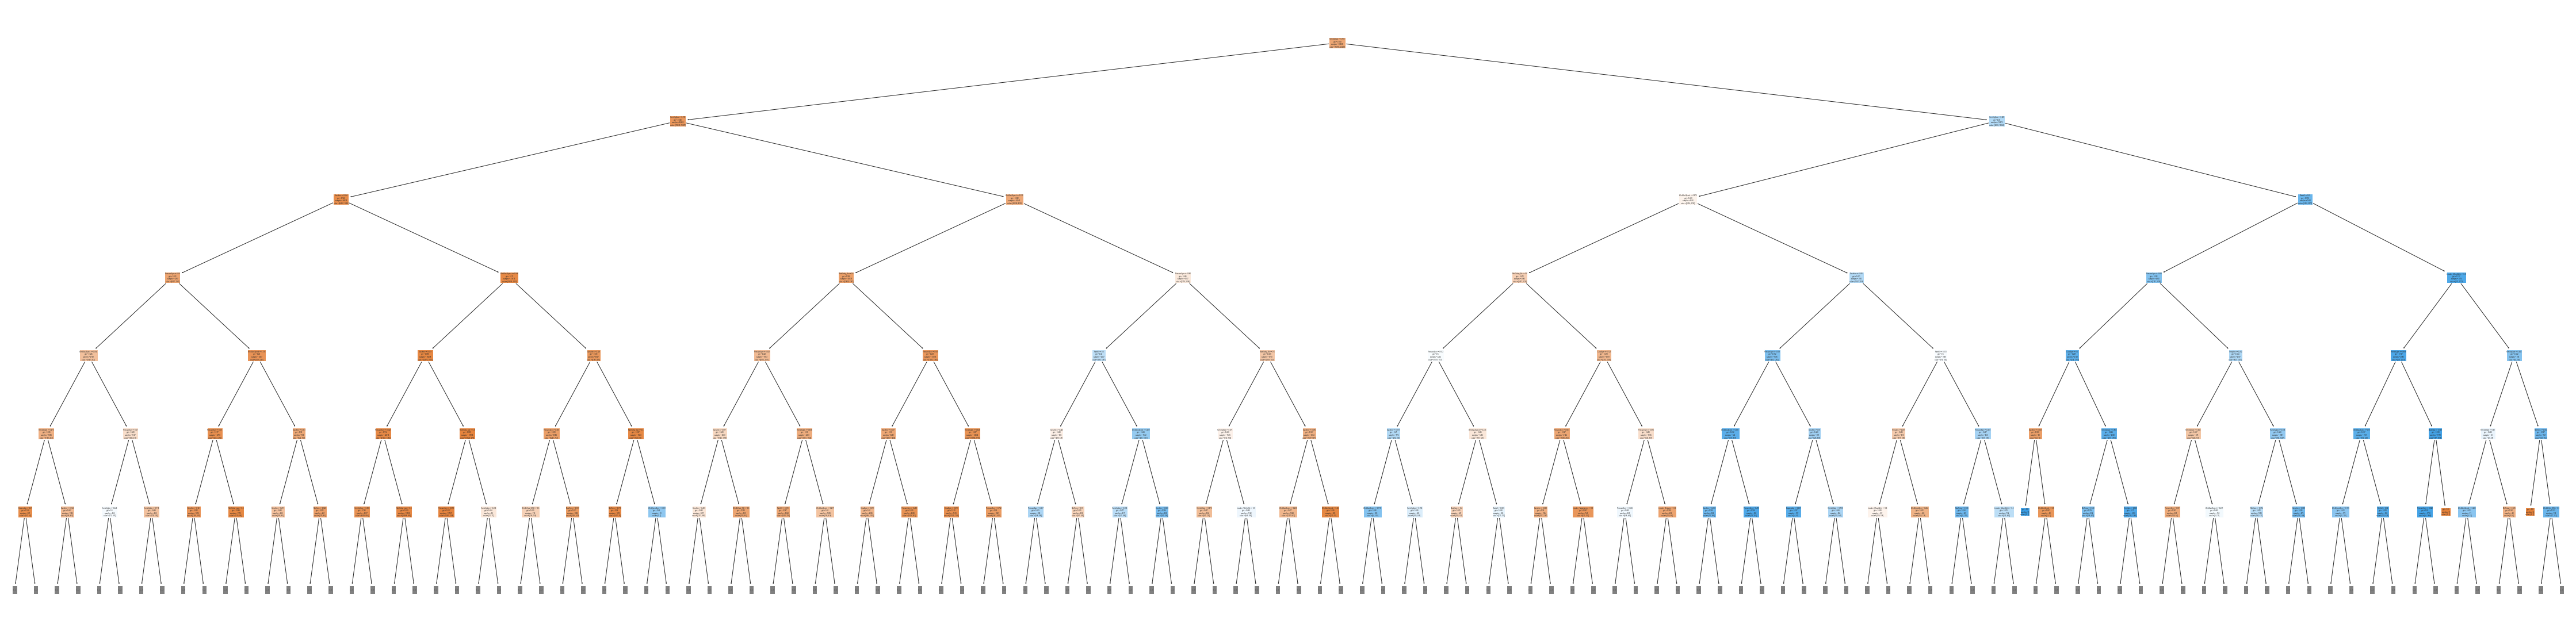

In [56]:
plt.figure(figsize=(80,20))
plot_tree(model_tree, max_depth = 6, feature_names= X_train.columns, filled=True)

In [57]:
model_tree.tree_.max_depth

44

In [58]:
tree_text = export_text (model_tree,max_depth =10,feature_names=list(X_train.columns))

# Output :

In [59]:
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- Evaporation <= 0.01
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Evaporation >  0.01
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am <= 0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am >  0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |  

# Removing Overfitting

In [60]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
model.fit(X_train,  train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [62]:
model.score(X_train,  train_target)

0.8291308037337859

In [63]:
model.score(X_val, val_targets)

0.8334397307178921

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.515\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.534\ngini = 0.146\nsamples = 48075\nvalue = [44251, 3824]'),
 Text(0.0625, 0.125, 'gini = 0.341\nsamples = 6260\nvalue = [4897, 1363]'),
 Text(0.1875, 0.125, 'gini = 0.111\nsamples = 41815\nvalue = [39354, 2461]'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.362\nsamples = 34343\nvalue = [26188, 8155]'),
 Text(0.3125, 0.125, 'gini = 0.308\nsamples = 28176\nvalue = [22809, 5367]'),
 Text(0.4375, 0.125, 'gini = 0.495\nsamples = 6167\nvalue = [3379, 2788]'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, 'gini = 0.472\nsamples = 5583\nvalue = [3457, 2126]'),
 Text(0.6875, 0.125, 'gini

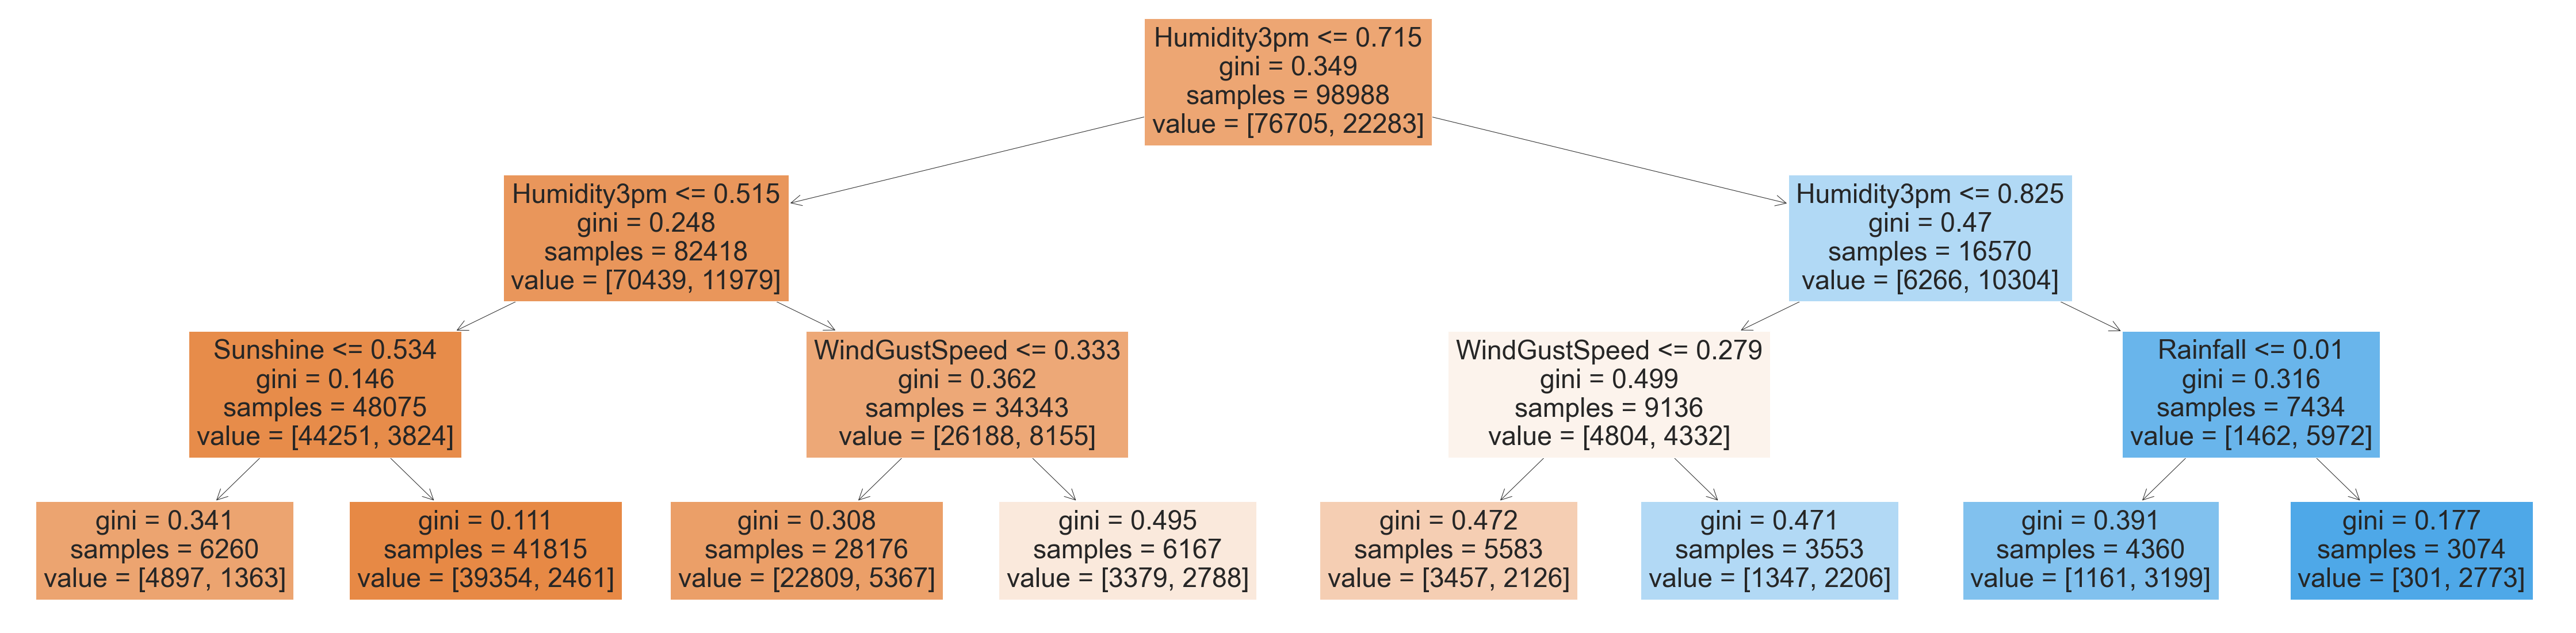

In [64]:
plt.figure(figsize=(80,20))
plot_tree(model, max_depth = 6, feature_names= X_train.columns, filled=True)

# Learning Outcome :

1. Learnt how to implement Decision Tree
2. Learnt how Decision Tree algo works.
3. Learnt how to perform data pre-processing
4. Learnt how to download and upload csv files
5. Learnt how to visualize data.